# Prediction of Students' Dopout and Success Using Machine Learning Techniques

https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention dataset

https://valoriza.ipportalegre.pt/piaes/features-info-stats.html data dictionary

https://www.mdpi.com/2306-5729/7/11/146 source

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
import operator
from sklearn.ensemble import RandomForestClassifier


# Original Data Overview

In [ ]:
#reading the csv file
df = pd.read_csv('students_dataset.csv')

In [ ]:
df.shape

(4424, 35)

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [ ]:
# check for missing entries in dataset
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#Data Preprocessing


```
'Marital status',                                      KEEP - 6 options
'Application mode',                                    DROP
   'Application order',                                KEEP - 1-9, first-ninth choice applied
   'Course',                                           KEEP - 1-17
   'Daytime/evening attendance',                       KEEP - 0/1
   'Previous qualification',                           KEEP - 1-17, will summarize to 1-7
   'Nacionality',                                      KEEP - 1-21
   'Mother's qualification',                           KEEP - 1-34, summarize to 1-10
   'Father's qualification',                           KEEP - 1-34, summarize to 1-10
   'Mother's occupation',                              KEEP
   'Father's occupation',                              KEEP
   'Displaced',                                        DROP
   'Educational special needs',                        KEEP - 0/1
   'Debtor',                                           KEEP - 0/1
   'Tuition fees up to date',                          KEEP - 0/1
   'Gender',                                           KEEP - 0/1
   'Scholarship holder',                               KEEP - 0/1
   'Age at enrollment',                                KEEP - 17-70
   'International',                                    KEEP - 0/1
   'Curricular units 1st sem (credited)',              KEEP
   'Curricular units 1st sem (enrolled)',              KEEP
   'Curricular units 1st sem (evaluations)',           DROP
   'Curricular units 1st sem (approved)',              DROP
   'Curricular units 1st sem (grade)',                 KEEP
   'Curricular units 1st sem (without evaluations)',   DROP
   'Curricular units 2nd sem (credited)',              KEEP
   'Curricular units 2nd sem (enrolled)',              KEEP
   'Curricular units 2nd sem (evaluations)',           DROP
   'Curricular units 2nd sem (approved)',              DROP
   'Curricular units 2nd sem (grade)',                 KEEP
   'Curricular units 2nd sem (without evaluations)',   DROP
   'Unemployment rate',                                DROP
   'Inflation rate',                                   DROP
   'GDP',                                              DROP
   'Target'                                            KEEP - 3 groups(enrolled, graduated, dropout)
```

In [ ]:
df = df.rename(columns = {'Marital status':'marital_status',
                          'Application order':'application_order',
                          'Course':'course',
                          'Daytime/evening attendance':'attend_time',
                          'Previous qualification':'prev_qualification',
                          'Nacionality':'nationality',
                          "Mother's qualification":'m_qualification',
                          "Father's qualification":'f_qualification',
                          'Educational special needs':'special_needs',
                          'Debtor':'in_debt',
                          'Tuition fees up to date':'tuition_due',
                          'Gender':'gender',
                          'Scholarship holder':'scholarship',
                          'Age at enrollment':'enroll_age',
                          'International':'international',
                          'Curricular units 1st sem (credited)':'credits1',
                          'Curricular units 1st sem (enrolled)':'enroll1',
                          'Curricular units 1st sem (grade)':'grade1',
                          'Curricular units 2nd sem (credited)':'credits2',
                          'Curricular units 2nd sem (enrolled)':'enroll2',
                          'Curricular units 2nd sem (grade)':'grade2',
                          'Target':'group'})

df.head()

,marital_status,Application mode,application_order,course,attend_time,prev_qualification,nationality,m_qualification,f_qualification,Mother's occupation,...,credits2,enroll2,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),grade2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,group
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.columns

Index(['marital_status', 'Application mode', 'application_order', 'course',
       'attend_time', 'prev_qualification', 'nationality', 'm_qualification',
       'f_qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'special_needs', 'in_debt', 'tuition_due', 'gender',
       'scholarship', 'enroll_age', 'international', 'credits1', 'enroll1',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)', 'grade1',
       'Curricular units 1st sem (without evaluations)', 'credits2', 'enroll2',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)', 'grade2',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'group'],
      dtype='object')

Replace placeholder numbers with their non-numeric meaning:


```
'marital_status',           1=Single, 2=Married, 3=Widow, 4=Divorced, 5=Facto Union, 6=Legally Separated
'application_order',

'course',                  (shortening titles and combining day/night attendance for the same course)
                          1=Biofuel Production, 2=Animation/Multimedia, 3/10=Social Services, 4=Agronomy, 5=Communications, 6=Veterinary,
                          7=Engineering, 8=Equiniculture, 9/17=Management, 11=Tourism, 12=Nursing, 13=Oral Hygiene, 14=Advertising,
                          15=Journalism, 16=Education

'attend_time',            1=day, 0=evening

'prev_qualification',         1=high school, 2/3/15=degree, 4/17=master, 5=doctorate, 6=some college, 7-13=did not complete high school,
                          14/16=other professional course

'nationality',            1=Portuguese, 2=German, 3=Spanish, 4=Italian, 5=Dutch, 6=English, 7=Lithuanian, 8=Angolan, 9=Cape Verdean,
                          10=Guinean,11=Mozambican, 12=Santomean, 13=Turkish, 14=Brazilian, 15=Romanian, 16=Republic of Moldovan,
                          17=Mexican, 18=Ukranian, 19=Russian, 20=Cuban, 21=Colombian

'm_qualification',            1/15=high school, 2/3/30=degree, 4/33=master, 5/34=doctorate, 6=some college,
                          7/8/10/11/12/14/17/19/20=completed middle school, 9/18/21/27/28=some schooling,
 13/16/22/23/29/31/32=other professional course, 24=unknown, 25/26=no schooling
'f_qualification',            same as above

'special_needs',                1=True, 0=False
'in_debt',                1=True, 0=False

'tuition_due',            ORIGINALLY was 1=True, 0=False, but swapped this so 0=True, 1=False

'gender',                    1=Male, 0=Female
'scholarship',            1=True, 0=False
'enroll_age',
'international',          1=True, 0=False
'credits1',       
'enroll1',
'grade1',
'credits2',
'enroll2',
'grade2',
'group'
```

In [ ]:
# making a copy of the original numerical dataset
original_df = df.iloc[:,0:35]
original_df

,marital_status,Application mode,application_order,course,attend_time,prev_qualification,nationality,m_qualification,f_qualification,Mother's occupation,...,credits2,enroll2,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),grade2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,group
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df.marital_status = df.marital_status.replace(range(1,7), ['Single', 'Married','Widow', 'Divorced', 'Facto Union', 'Legally Separated'])
df.marital_status.value_counts()

Single               3919
Married               379
Divorced               91
Facto Union            25
Legally Separated       6
Widow                   4
Name: marital_status, dtype: int64

In [ ]:
df.application_order = df.application_order.replace(range(1,10), ['1st', '2nd','3rd', '4th', '5th', '6th', '7th', '8th', '9th'])
df.application_order.value_counts()

1st    3026
2nd     547
3rd     309
4th     249
5th     154
6th     137
9th       1
0         1
Name: application_order, dtype: int64

In [ ]:
df.course = df.course.replace(range(1,18), ['Biofuel Production', 'Animation/Multimedia', 'Social Services', 'Agronomy',
                                                                       'Communications', 'Veterinary', 'Engineering', 'Equiniculture', 'Management', 'Social Services',
                                                                       'Tourism', 'Nursing', 'Oral Hygiene', 'Advertising', 'Journalism', 'Education', 'Management'])
df.course.value_counts()

Nursing                 766
Management              648
Social Services         570
Veterinary              337
Journalism              331
Advertising             268
Tourism                 252
Communications          226
Animation/Multimedia    215
Agronomy                210
Education               192
Engineering             170
Equiniculture           141
Oral Hygiene             86
Biofuel Production       12
Name: course, dtype: int64

In [ ]:
df.attend_time = df.attend_time.replace([0, 1], ['Evening', 'Daytime'])
df.attend_time.value_counts()

Daytime    3941
Evening     483
Name: attend_time, dtype: int64

In [ ]:
df.prev_qualification = df.prev_qualification.replace(range(1,18), ['High School', 'Degree', 'Degree', 'Master', 'Doctorate',
                                                                                            'Some College', 'Did Not Complete High School', 'Did Not Complete High School',
                                                                                           'Did Not Complete High School', 'Did Not Complete High School',
                                                                                           'Did Not Complete High School', 'Did Not Complete High School',
                                                                                           'Did Not Complete High School', 'Other Professional Course', 'Degree',
                                                                                            'Other Professional Course', 'Master'])
df.prev_qualification.value_counts()

High School                     3717
Other Professional Course        255
Did Not Complete High School     232
Degree                           189
Some College                      16
Master                            14
Doctorate                          1
Name: prev_qualification, dtype: int64

In [ ]:
df.nationality = df.nationality.replace(range(1,22), ['Portuguese', 'German','Spanish', 'Italian', 'Dutch',
                                                                                                  'English', 'Lithuania', 'Angolan', 'Cape Verdean', 'Guinean', 'Mozambican',
                                                                                                  'Santomean', 'Turkish', 'Brazilian', 'Romanian', 'Republic of Moldovan',
                                                                                                  'Mexican', 'Ukranian', 'Russian', 'Cuban', 'Colombian'])
df.nationality.value_counts()

Portuguese              4314
Brazilian                 38
Santomean                 14
Cape Verdean              13
Spanish                   13
Guinean                    5
Republic of Moldovan       3
Italian                    3
Ukranian                   3
Angolan                    2
Mexican                    2
Romanian                   2
Mozambican                 2
German                     2
Russian                    2
Turkish                    1
Dutch                      1
Colombian                  1
Cuban                      1
English                    1
Lithuania                  1
Name: nationality, dtype: int64

In [ ]:
df.m_qualification = df.m_qualification.replace(range(1,35), ['High School', 'Degree', 'Degree', 'Master', 'Doctorate', 'Some College',
                                                                'Middle School', 'Middle School', 'Some Schooling', 'Middle School', 'Middle School', 'Middle School',
                                                                'Other Professional Course', 'Middle School', 'High School', 'Other Professional Course', 'Middle School',
                                                                'Some Schooling', 'Middle School', 'Middle School', 'Some Schooling', 'Other Professional Course',
                                                                'Other Professional Course', 'Unknown Education', 'No Schooling', 'No Schooling', 'Some Schooling',
                                                                'Some Schooling', 'Other Professional Course', 'Degree', 'Other Professional Course',
                                                                'Other Professional Course', 'Master', 'Doctorate'])
df.m_qualification.value_counts()

Other Professional Course    2526
High School                  1070
Degree                        521
Middle School                 193
Master                         49
Doctorate                      21
Some Schooling                 17
No Schooling                   15
Unknown Education               8
Some College                    4
Name: m_qualification, dtype: int64

In [ ]:
df.f_qualification = df.f_qualification.replace(range(1,35), ['High School', 'Degree', 'Degree', 'Master', 'Doctorate', 'Some College',
                                                                'Middle School', 'Middle School', 'Some Schooling', 'Middle School', 'Middle School', 'Middle School',
                                                                'Other Professional Course', 'Middle School', 'High School', 'Other Professional Course', 'Middle School',
                                                                'Some Schooling', 'Middle School', 'Middle School', 'Some Schooling', 'Other Professional Course',
                                                                'Other Professional Course', 'Unknown Education', 'No Schooling', 'No Schooling', 'Some Schooling',
                                                                'Some Schooling', 'Other Professional Course', 'Degree', 'Other Professional Course',
                                                                'Other Professional Course', 'Master', 'Doctorate'])
df.f_qualification.value_counts()

Some Schooling               1927
Middle School                1023
High School                   905
Degree                        355
Unknown Education             112
Master                         41
Other Professional Course      30
Doctorate                      19
No Schooling                   10
Some College                    2
Name: f_qualification, dtype: int64

In [ ]:
df.special_needs = df.special_needs.replace([0,1], [False, True])
df.special_needs.value_counts()

False    4373
True       51
Name: special_needs, dtype: int64

In [ ]:
df.in_debt = df.in_debt.replace([0,1], [False, True])
df.in_debt.value_counts()

False    3921
True      503
Name: in_debt, dtype: int64

In [ ]:
df.tuition_due = df.tuition_due.replace([0,1], [True, False])
df.tuition_due.value_counts()

False    3896
True      528
Name: tuition_due, dtype: int64

In [ ]:
df.gender = df.gender.replace([0,1], ['Female', 'Male'])
df.gender.value_counts()

Female    2868
Male      1556
Name: gender, dtype: int64

In [ ]:
df.scholarship = df.scholarship.replace([0,1], [False, True])
df.scholarship.value_counts()

False    3325
True     1099
Name: scholarship, dtype: int64

In [ ]:
df.international = df.international.replace([0,1], [False, True])
df.international.value_counts()

False    4314
True      110
Name: international, dtype: int64

In [ ]:
df.head()

,marital_status,Application mode,application_order,course,attend_time,prev_qualification,nationality,m_qualification,f_qualification,Mother's occupation,...,credits2,enroll2,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),grade2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,group
0,Single,8,5th,Animation/Multimedia,Daytime,High School,Portuguese,Other Professional Course,Middle School,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,6,1st,Tourism,Daytime,High School,Portuguese,High School,Degree,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1,5th,Communications,Daytime,High School,Portuguese,Other Professional Course,Some Schooling,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,8,2nd,Journalism,Daytime,High School,Portuguese,Other Professional Course,Some Schooling,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,12,1st,Social Services,Evening,High School,Portuguese,Other Professional Course,Some Schooling,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Visualization

<Axes: >

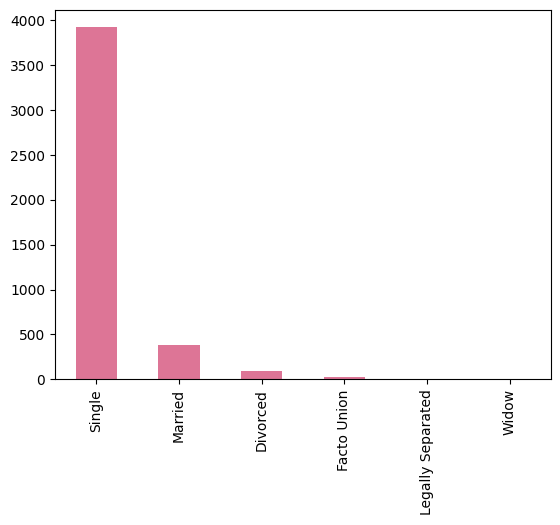

In [ ]:
# marital status
pd.value_counts(df['marital_status']).plot.bar(color = '#DD7596')

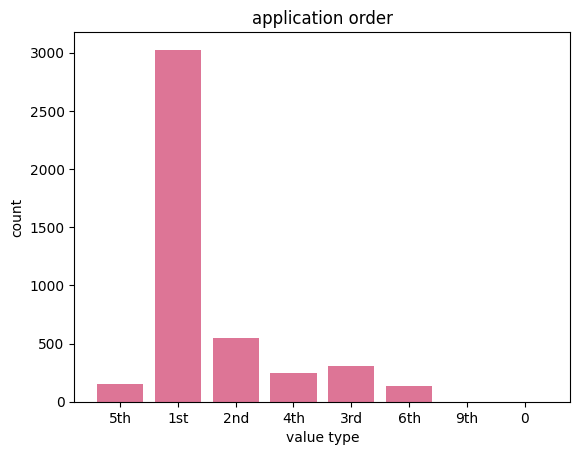

In [ ]:
#application_order
counted_values = df['application_order'].value_counts()
height = [154, 3026, 547, 249, 309, 137, 1, 1] # get numbers from counted_values
bars = df.application_order.unique()
x_pos = np.arange(len(bars))

plt.bar(x_pos, height, color = '#DD7596')

plt.title('application order')
plt.xlabel('value type')
plt.ylabel('count')

plt.xticks(x_pos, bars)
plt.show()

<Axes: >

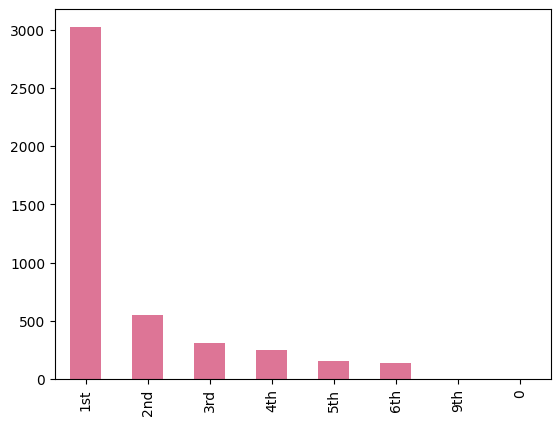

In [ ]:
pd.value_counts(df['application_order']).plot.bar(color = '#DD7596')

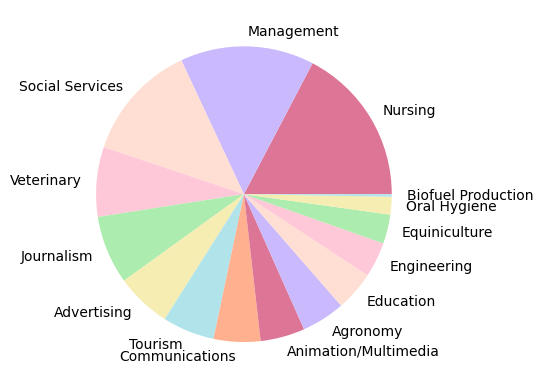

In [ ]:
# course bar plot
colours = [ '#DD7596', '#CBB9FE', '#FFDFD3', '#FEC8D8', '#ACECAE', '#F6EDB3', '#B0E3EA', '#FFB08F']

values = df['course'].value_counts()
groups = df['course'].value_counts().keys().tolist()

plt.pie(values, colors=colours, labels = groups)
plt.show()

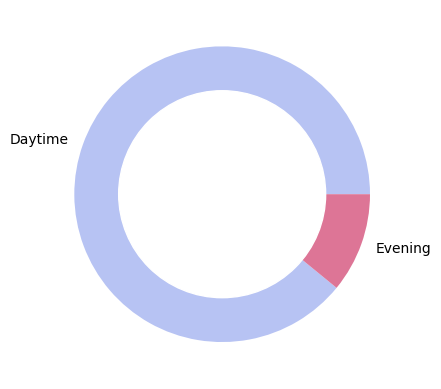

In [ ]:
# attended time
colors = ['#B7C3F3', '#DD7596']
groups='Daytime', 'Evening'

values = df['attend_time'].value_counts().values

plt.pie(values, colors=colors, labels=groups)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

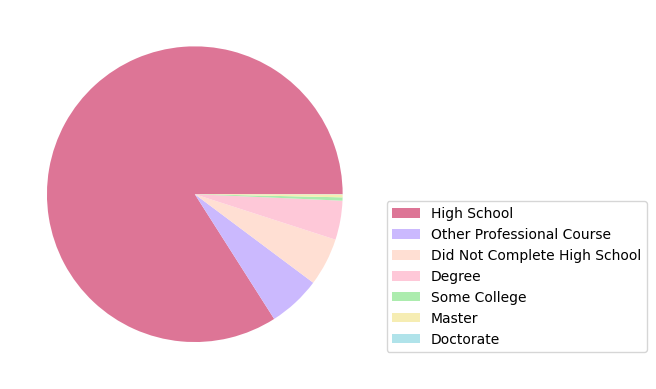

In [ ]:
# previous qualification

values = df['prev_qualification'].value_counts()
groups = df['prev_qualification'].value_counts().keys().tolist()

plt.pie(values, colors=colours, labels = None)
plt.legend(groups,bbox_to_anchor=(1,0.5))
plt.show()

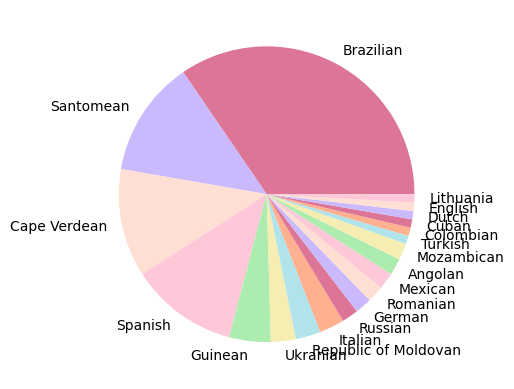

In [ ]:
# nationality

# dropped portuguese people because they were too many (97.5% portuguese)
grouped = df.groupby(['nationality'])
df1 = df.drop(grouped.get_group(('Portuguese')).index)

values = df1['nationality'].value_counts()
groups = df1['nationality'].value_counts().keys().tolist()

plt.pie(values, colors=colours, labels = groups)
#plt.legend(groups,bbox_to_anchor=(1,0.75))
plt.rc('font', size=7)
plt.show()

In [ ]:
df.nationality.value_counts(normalize=True)

Portuguese              0.975136
Brazilian               0.008590
Santomean               0.003165
Cape Verdean            0.002939
Spanish                 0.002939
Guinean                 0.001130
Republic of Moldovan    0.000678
Italian                 0.000678
Ukranian                0.000678
Angolan                 0.000452
Mexican                 0.000452
Romanian                0.000452
Mozambican              0.000452
German                  0.000452
Russian                 0.000452
Turkish                 0.000226
Dutch                   0.000226
Colombian               0.000226
Cuban                   0.000226
English                 0.000226
Lithuania               0.000226
Name: nationality, dtype: float64

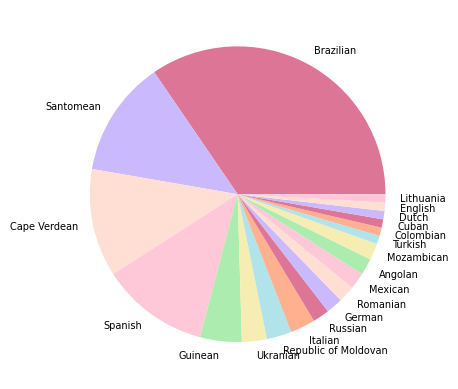

In [ ]:
grouped = df.groupby(['nationality'])
df1 = df.drop(grouped.get_group(('Portuguese')).index)

values = df1['nationality'].value_counts()
groups = df1['nationality'].value_counts().keys().tolist()

plt.pie(values, colors=colours, labels = groups)
#plt.legend(groups,bbox_to_anchor=(1,0.75))
plt.rc('font', size=7)
plt.show()

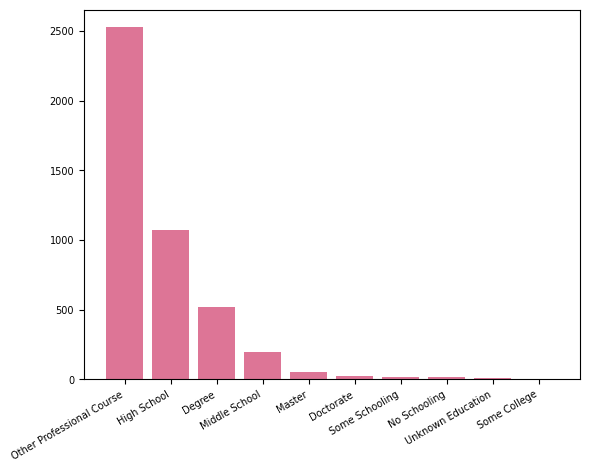

In [ ]:
# mother's qualification

values = df['m_qualification'].value_counts()
groups = df['m_qualification'].value_counts().keys().tolist()

plt.bar(groups, values, color='#DD7596')
plt.xticks(rotation=30, ha='right')
plt.show()

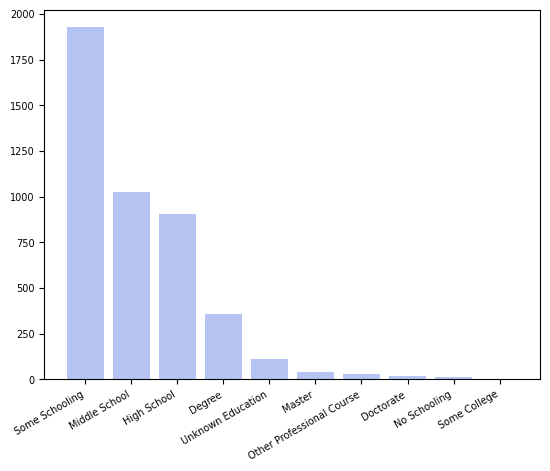

In [ ]:
# father's qualification

values = df['f_qualification'].value_counts()
groups = df['f_qualification'].value_counts().keys().tolist()

plt.bar(groups, values, color='#B7C3F3')
plt.xticks(rotation=30, ha='right')
plt.show()

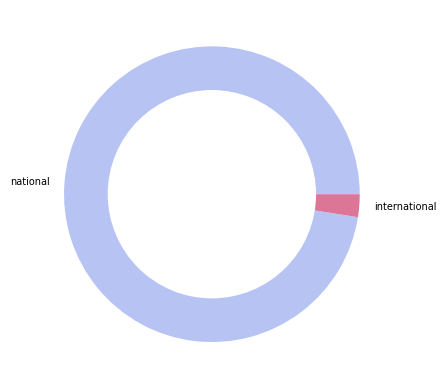

In [ ]:
# international students
values = df['international'].value_counts()
groups = df['international'].value_counts().keys().tolist()

groups = ["national", "international"]

plt.pie(values, colors=['#B7C3F3', '#DD7596'], labels = groups)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
df.columns

Index(['marital_status', 'Application mode', 'application_order', 'course',
       'attend_time', 'prev_qualification', 'nationality', 'm_qualification',
       'f_qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'special_needs', 'in_debt', 'tuition_due', 'gender',
       'scholarship', 'enroll_age', 'international', 'credits1', 'enroll1',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)', 'grade1',
       'Curricular units 1st sem (without evaluations)', 'credits2', 'enroll2',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)', 'grade2',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'group'],
      dtype='object')

In [ ]:
#the column Target has the most impotant information about the dataset: if a student is a Dropout, Graduate or Enrolled
df['group'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
#for a better use of the column Target, we normalize the data as Dropout: 0, Graduate: 1 and Enrolled: 2
df['group'] = df['group'].map({
    'Dropout':0,
    'Graduate':1,
    'Enrolled':2,

})

In [ ]:
df['group'].head(10)

0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: group, dtype: int64

In [ ]:
df['group'].value_counts()

1    2209
0    1421
2     794
Name: group, dtype: int64

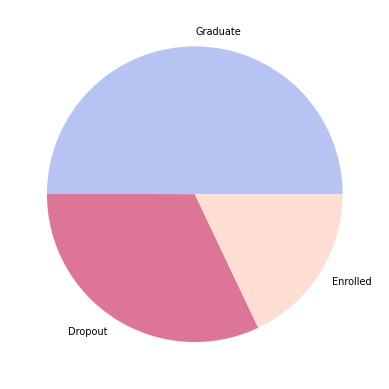

In [ ]:
#pie chart
colors = ['#B7C3F3', '#DD7596', '#FFDFD3']
groups='Graduate', 'Dropout', 'Enrolled'

values = df['group'].value_counts().values

plt.pie(values, colors=colors, labels=groups)
plt.show()

In [ ]:
#distribution of the student's age at enrollment
fig = px.histogram(df['enroll_age'], x='enroll_age',color_discrete_sequence=['#DD7596'])
fig.show()


In [ ]:
#distribution of the student's age at enrollment by gender
fig = px.histogram(df, x='enroll_age',color='gender', color_discrete_sequence=['#B7C3F3','#DD7596'])
fig.show()

<ipython-input-48-6a4d0fb9cba3>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

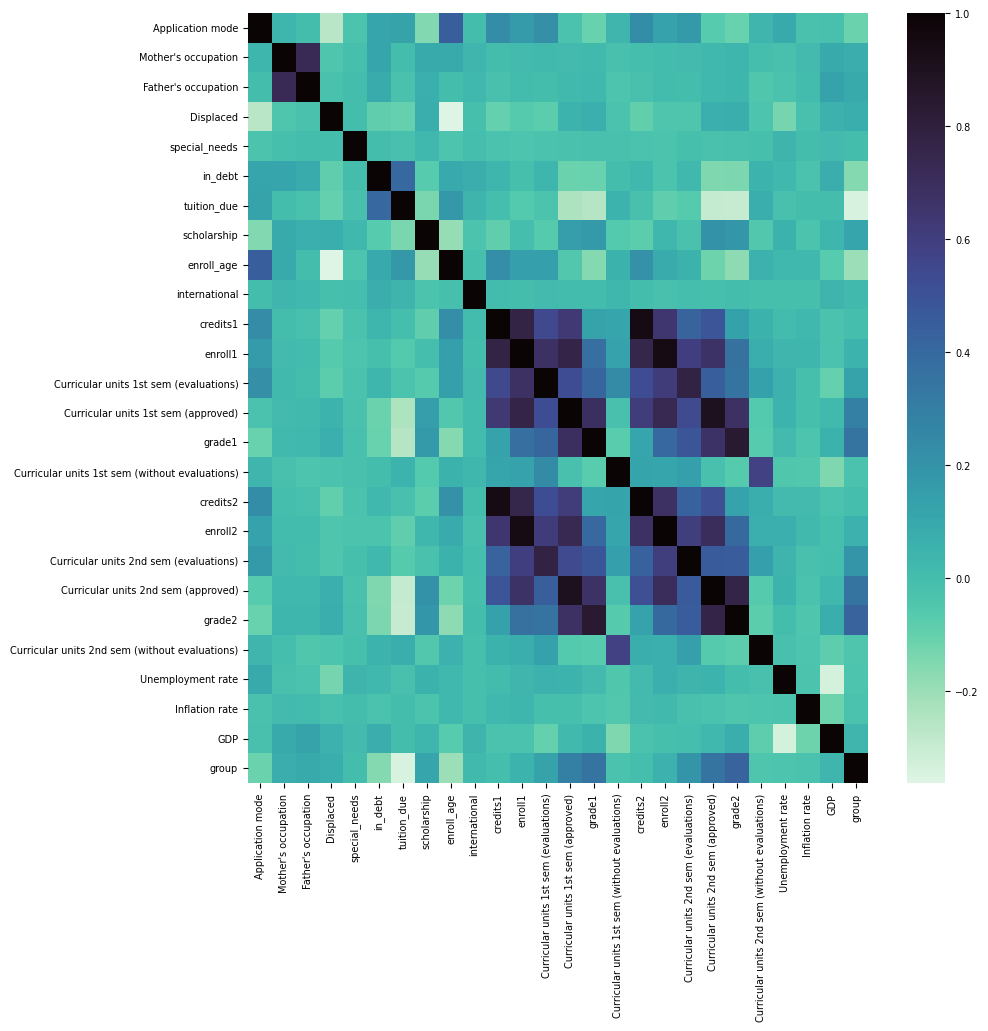

In [ ]:
#correlation map
sns.set_palette('pastel')
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='mako_r')

In [ ]:
#curricular units 1st sem (graded) & curricular units 2nd sem (graded)
fig = px.scatter(df,
             x = 'grade1',
             y = 'grade2',
             color = 'group')
fig.show()

In [ ]:
#curricular units 1st sem (enrolled) & curricular units 2nd sem (enrolled)
fig = px.scatter(df,
             x = 'enroll1',
             y = 'enroll2',
             color = 'group')
fig.show()

# Correlation Methods

In [ ]:
# Pearson Correlation
df.corr(method='pearson')['group'].sort_values(ascending=False)

<ipython-input-51-8ec8693db7a0>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



group                                             1.000000
grade2                                            0.429214
Curricular units 2nd sem (approved)               0.351135
grade1                                            0.349652
Curricular units 1st sem (approved)               0.290243
Curricular units 2nd sem (evaluations)            0.194412
Curricular units 1st sem (evaluations)            0.125278
scholarship                                       0.114517
Father's occupation                               0.094916
Mother's occupation                               0.077593
Displaced                                         0.070649
enroll2                                           0.060670
enroll1                                           0.052020
GDP                                               0.037052
international                                     0.015893
special_needs                                     0.003751
credits2                                         -0.0024

In [ ]:
# Kendall Correlation
df.corr(method='kendall')['group'].sort_values(ascending=False)

<ipython-input-52-adc21f2c377e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



group                                             1.000000
Curricular units 2nd sem (approved)               0.287662
Curricular units 1st sem (approved)               0.258199
grade2                                            0.256809
grade1                                            0.215658
Curricular units 2nd sem (evaluations)            0.156691
scholarship                                       0.126430
Curricular units 1st sem (evaluations)            0.108546
enroll2                                           0.078603
enroll1                                           0.075464
Displaced                                         0.072733
GDP                                               0.038027
Father's occupation                               0.025044
Mother's occupation                               0.020455
international                                     0.014720
credits2                                          0.003244
special_needs                                     0.0028

In [ ]:
# Spearman Correlation
df.corr(method='spearman')['group'].sort_values(ascending=False)

<ipython-input-53-b4945dca7951>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



group                                             1.000000
Curricular units 2nd sem (approved)               0.374350
grade2                                            0.342133
Curricular units 1st sem (approved)               0.330500
grade1                                            0.285433
Curricular units 2nd sem (evaluations)            0.182367
scholarship                                       0.132795
Curricular units 1st sem (evaluations)            0.124560
enroll2                                           0.091566
enroll1                                           0.087924
Displaced                                         0.076395
GDP                                               0.046600
Father's occupation                               0.030943
Mother's occupation                               0.024814
international                                     0.015461
credits2                                          0.003512
special_needs                                     0.0029

After looking at the results of different correlation algorithms, we have decided on using these 7 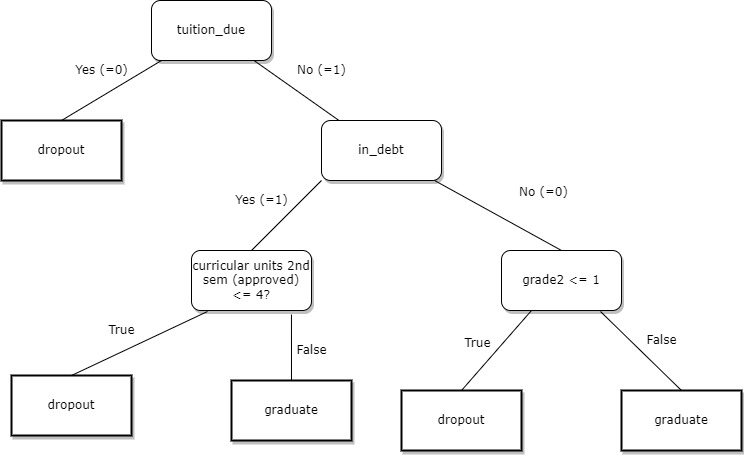columns to implement the classifiers: grade 2, curricular units 2nd sem (approved), curricular units 1st sem (approved), grade1, tuition_due, enroll_age, in_debt

# Original Dataset for the Algorithms

In [ ]:
# This is the new Df considering relevant input and output columns
original_df = original_df.iloc[:,[13,14,17,22,23,28,29,34]]
df_for_prediction = original_df
original_df.head()

,in_debt,tuition_due,enroll_age,Curricular units 1st sem (approved),grade1,Curricular units 2nd sem (approved),grade2,group
0,0,1,20,0,0.000000,0,0.000000,Dropout
1,0,0,19,6,14.000000,6,13.666667,Graduate
2,0,0,19,0,0.000000,0,0.000000,Dropout
3,0,1,20,6,13.428571,5,12.400000,Graduate
4,0,1,45,5,12.333333,6,13.000000,Graduate


In [ ]:
# Remove enrolled students
original_df = original_df[original_df['group'] != 'Enrolled']

In [ ]:
#We need the numeric version of the column 'group' for the algorithms
original_df = original_df.replace({'group': {'Dropout': 0, 'Graduate': 1}})

In [ ]:
# Perform one-hot encoding
original_df = pd.get_dummies(original_df, drop_first=True)

In [ ]:
original_df.head()

,in_debt,tuition_due,enroll_age,Curricular units 1st sem (approved),grade1,Curricular units 2nd sem (approved),grade2,group
0,0,1,20,0,0.000000,0,0.000000,0
1,0,0,19,6,14.000000,6,13.666667,1
2,0,0,19,0,0.000000,0,0.000000,0
3,0,1,20,6,13.428571,5,12.400000,1
4,0,1,45,5,12.333333,6,13.000000,1


# Splitting the Dataset (Training & Test)

In [ ]:
x = original_df.iloc[:,0:7]
y = original_df.iloc[:, -1]

In [ ]:
#splitting the dataset in training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 7)
(726, 7)
(2904,)
(726,)


# Functions for printing: Confusion Matrix Plot, ROC curve & Results

In [ ]:
results = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, model_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'], )
    disp.plot(values_format='')
    plt.show()

In [ ]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    auc = metrics.roc_auc_score(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.95, 0.05, 'AUC = %0.3f' % auc, ha='right', weight='bold')

In [ ]:
def print_results(algo, y_test, y_pred):

    global results
    print(algo)
    print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_pred))
    print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred))
    print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred))
    print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred))
    # Write results into a dataframe
    row = {'Algorithm': algo, 'Accuracy': metrics.accuracy_score(y_test, y_pred),
           'Precision': metrics.precision_score(y_test, y_pred), 'Recall': metrics.recall_score(y_test, y_pred),
           'F1 Score': metrics.f1_score(y_test, y_pred)}
    results = pd.concat([results, pd.DataFrame(row, index=[0])], ignore_index=True)
    results = results.reset_index(drop=True)

# Classification Algorithms

## Decision Tree from Scratch

We want to use interest gain as a attribution selection method. For this, we are using the feature_importance function from the Decision Tree Classifier class.

In [ ]:
dt = DecisionTreeClassifier(random_state=0, criterion='entropy')

dt.fit(x_train,y_train)

# get feature importance using gini importance
importances = dt.feature_importances_

no_group_df = x_train

gains={}
for i, feature in enumerate(no_group_df):
  gain=importances[i]
  print(f'Gain ratio for {feature}: {gain:.3f}')
  gains[feature] = gain

print()
# Find the feature with the highest gain (=importance)
best_feature = max(gains, key=gains.get)

# Print the best feature for splitting
print(f'Best feature for splitting: {best_feature}')

Gain ratio for in_debt: 0.014
Gain ratio for tuition_due: 0.062
Gain ratio for enroll_age: 0.097
Gain ratio for Curricular units 1st sem (approved): 0.041
Gain ratio for grade1: 0.124
Gain ratio for Curricular units 2nd sem (approved): 0.527
Gain ratio for grade2: 0.135

Best feature for splitting: Curricular units 2nd sem (approved)


--> we should split the tree using the Curricular units 2nd sem (approved) attribute, but since this attribute can have values from 0 to 20, we will instead define our own rules for the decision tree.

In [ ]:
x_train['Curricular units 2nd sem (approved)'].value_counts()

6     694
0     627
5     436
8     254
7     242
4     201
3     126
2     100
1      75
11     37
12     28
10     28
13     20
9      19
17      6
14      3
18      2
16      2
19      2
20      2
Name: Curricular units 2nd sem (approved), dtype: int64

In [ ]:
# data exploration for rule definition
df_step1 = original_df.drop(original_df[original_df['tuition_due'] == 0].index)
df_step1 = df_step1.drop(columns='tuition_due')
groups = df_step1.groupby(['group'])
dropouts = groups.get_group(0)
graduate = groups.get_group(1)

In [ ]:
df_step2 = df_step1.drop(df_step1[df_step1['in_debt'] == 1].index)
df_step2 = df_step2.drop(columns='in_debt')
groups = df_step2.groupby(['group'])
dropouts = groups.get_group(0)
graduate = groups.get_group(1)

In [ ]:
df_step3 = df_step2.drop(df_step2[df_step2['grade2'] <= 1].index)

groups = df_step3.groupby(['group'])
dropouts = groups.get_group(0)
graduate = groups.get_group(1)

##### Rules:
1. If tuition is due, students drop out
2. If students are in debt and have less than 5 approved curricular units in their second semester, they dropout
3. if student are in debt and have more or equal 5 approved curricular units in their second semester, they graduate
5. Students that pay their tuition and aren't in debt will graduate unless they have 1 or less than that as their grade in their second semester

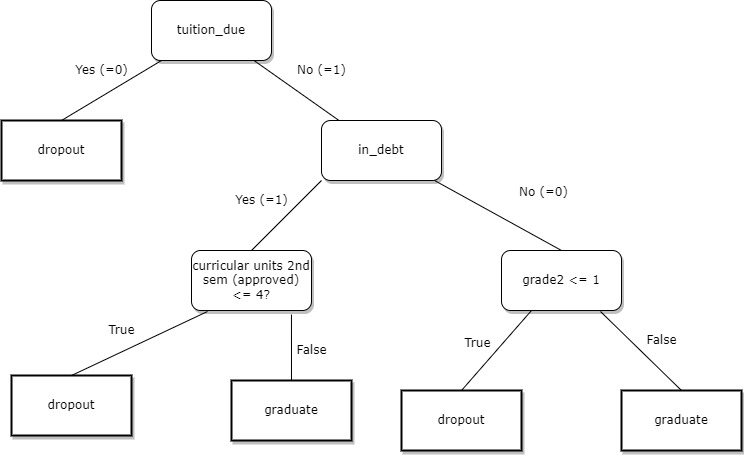

In [ ]:
# decision tree

def decision_tree(dataset):
  predicted_class = [None]*len(dataset)
  for i in range(len(dataset)):
    predicted_class[i] = follow_path(dataset.iloc[i])
  dataset['predicted_class'] = predicted_class
  return dataset

# return 0 for dropout, 1 for graduate
def follow_path(student):
  if(student['tuition_due'] == 0):
    return 0
  elif(student['in_debt'] == 1):
    if(student['Curricular units 2nd sem (approved)'] <= 4):
      return 0
    else:
      return 1
  elif(student['in_debt'] == 0):
    if(student['grade2'] <= 1):
      return 0
    else:
      return 1
  # if there is a mistake, return -1
  else:
    return -1

In [ ]:
df_decision_tree_train = x_train.iloc[:, 0:7]
dt_training = decision_tree(df_decision_tree_train)

In [ ]:
df_decision_tree_test = x_test.iloc[:,0:7]
dt_testing = decision_tree(df_decision_tree_test)

In [ ]:
print_results('Decision Tree', y_test, dt_testing['predicted_class'])

Decision Tree
Accuracy: 0.858
Precision: 0.836
Recall: 0.947
F1 Score: 0.888


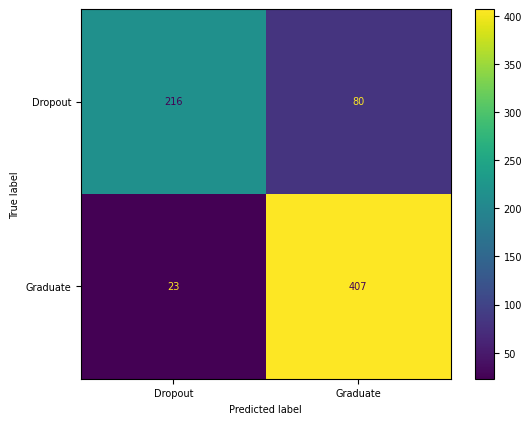

In [ ]:
cm = metrics.confusion_matrix(y_test, dt_testing['predicted_class'])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'], )
disp.plot(values_format='')
plt.show()

## Decision Tree sklearn

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [ ]:
print_results('Decision Tree', y_test, y_pred)

Decision Tree
Accuracy: 0.844
Precision: 0.888
Recall: 0.844
F1 Score: 0.865


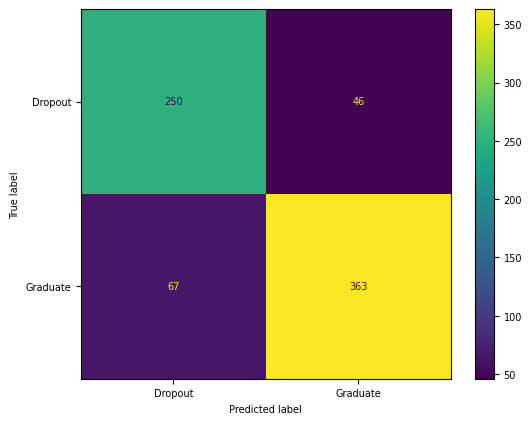

In [ ]:
conf_matrix_plot(dt, x_test, y_test)

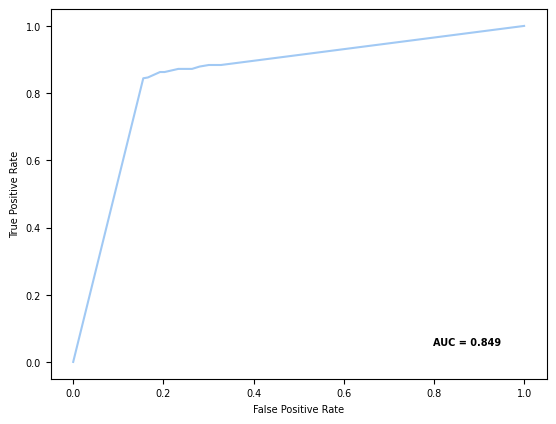

In [ ]:
y_preds_prob_dt = dt.predict_proba(x_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_dt)

## Bayesian Classifier from Scratch

In [ ]:
import math

In [ ]:
#naive bayes: gaussian
# we assume the attributes are independent from each other

# maximise P(Ci | X) = (P(X|Ci)*P(Ci)/P(X)) but P(X) is a constant

# get P(Ci) for each class -> P(Ci)=|Ci,D|/|D|: number of tuples of class Ci divided by number of tupels in total
# maximise P(X|Ci)*P(Ci)
# since attributes are independant: P(X|Ci) = P(x1|Ci)*P(x2|Ci)*...*P(xn|Ci)
# x are attribute values, if attribute is categorical: P(xk|Ci): number of tuples in class i having xk as their value for this Attribute divided by number of tuples in class Ci
# x if attribute is continous: P(xk|Ci): gaussian distribution = g(xk,μCi,δCi) get δ and μ with values of Attribut for tuples in class Ci
# highest P gets labeled as class

In [ ]:
# put x_train and y_train together again for probability calculation
df_bayesian_classifier = x_train.iloc[:,0:7]
df_bayesian_classifier['group'] = y_train

In [ ]:
# get probability for all 2 classes: 0 for Dropout or 1 for Graduate
total_tuples = len(y_train)
prob_dropout = df_bayesian_classifier['group'].value_counts()[0] / total_tuples
prob_graduate = df_bayesian_classifier['group'].value_counts()[1] / total_tuples

# for each attribute, we need to know if the values are continuous or categorical:
# continous: Curricular units 1st sem (approved), Curricular units 2nd sem (approved), grade1, grade2
# categorical: in_debt, tuition_due, enroll_age (column index: 0,1,2)

def px(group, student):
  p=1
  for i in range(0,7):
    if(i == 0 or i == 1 or i == 2):
      p = p*get_prob_categorical(group,i,student)
    else:
     p = p*get_prob_continuous(group,i,student)
  return p

def get_prob_continuous(group, i, student):
  # get mean and standard deviation for the specific class and attribute
  mean = df_bayesian_classifier.loc[df_bayesian_classifier['group'] == group].iloc[:,i].mean()
  deviation = df_bayesian_classifier.loc[df_bayesian_classifier['group'] == group].iloc[:,i].std()

  # calculate probability based on gaussian distribution
  gauss = (1/math.sqrt(2*math.pi)*deviation)*math.e**(-((student[i]-mean)**2)/2*(deviation**2))
  return gauss

def get_prob_categorical(group, i, student):
  df_class = df_bayesian_classifier.loc[df_bayesian_classifier['group'] == group]
  total_tuples_class = df_class.shape[0]
  # get count of value for student[i] or 0
  tuples_value = df_class.iloc[:,i].value_counts().to_dict().get(student[i], 0)
  return tuples_value/total_tuples_class

def bayesian_classifier(dataset):
  # set all predictions to dropout and only change if they are predicted to graduate
  dataset['predicted_group'] = 0

  # count how many times we get a probability of zero for both classes
  zero_prob = 0
  dropout_more_likely = 0
  dropout_not_zero = 0
  graduate_more_likely = 0

  for index in range(len(dataset)):
    probabilities = [px(0, dataset.iloc[index]), px(1, dataset.iloc[index])]
    if (probabilities[0] != 0):
      dropout_not_zero = dropout_not_zero + 1
      if (probabilities[0] > probabilities[1]):
        dropout_more_likely = dropout_more_likely +1
    if(probabilities[0] == 0 and probabilities[1] == 0):
      zero_prob = zero_prob + 1
    if (probabilities[1] > probabilities[0]):
      dataset.iloc[index,7] = 1
      graduate_more_likely = graduate_more_likely +1

  print(f'zero probability: {zero_prob}')
  print(f'dropout not zero: {dropout_not_zero}')
  print(f'dropout more likely: {dropout_more_likely}')
  print(f'graduate more likely: {graduate_more_likely}')
  return dataset


In [ ]:
df_bayesian_train = x_train.iloc[:,0:7]
b_training = bayesian_classifier(df_bayesian_train)

zero probability: 585
dropout not zero: 95
dropout more likely: 0
graduate more likely: 2319


In [ ]:
df_bayesian_test = x_test.iloc[:,0:7]
b_testing = bayesian_classifier(df_bayesian_test)

zero probability: 158
dropout not zero: 17
dropout more likely: 0
graduate more likely: 568


In [ ]:
print_results('Bayesian Classifier', y_test, b_testing['predicted_group'])

Bayesian Classifier
Accuracy: 0.755
Precision: 0.722
Recall: 0.953
F1 Score: 0.822


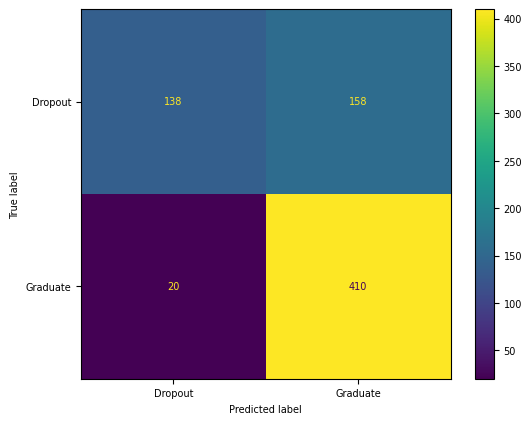

In [ ]:
cm = metrics.confusion_matrix(y_test, b_testing['predicted_group'])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'], )
disp.plot(values_format='')
plt.show()

## Bayesian Classifier sklearn

In [ ]:
# Normalize data.
X_scaled_train = StandardScaler().fit_transform(x_train)
X_scaled_test = StandardScaler().fit_transform(x_test)
# Fit the model.
gnb = GaussianNB()
gnb.fit(X_scaled_train, y_train)
# Get the predictions on test data.
y_pred = gnb.predict(X_scaled_test)

In [ ]:
print_results('Naive Bayes', y_test, y_pred)

Naive Bayes
Accuracy: 0.857
Precision: 0.840
Recall: 0.937
F1 Score: 0.886


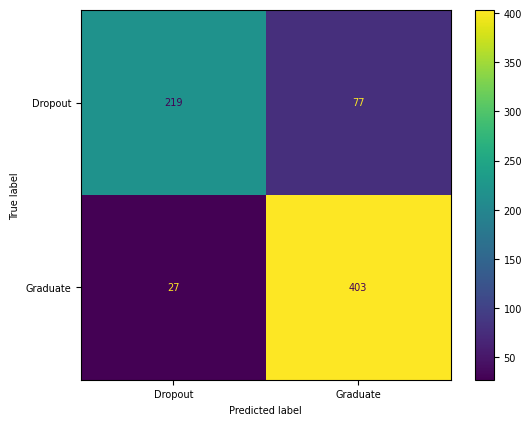

In [ ]:
conf_matrix_plot(gnb, X_scaled_test, y_test)

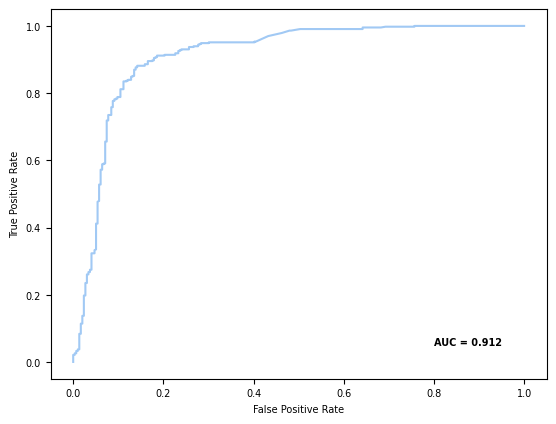

In [ ]:
y_preds_prob_gnb = gnb.predict_proba(X_scaled_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob_gnb)

## MLP Neural Network from Scratch

In [ ]:
# Sigmoid activation function
def sigmoid_act(x, der=False):
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    return f

# Rectifier Linear Unit (ReLU) activation function
def ReLU_act(x, der=False):
    if (der == True): # derivative of the ReLU ( = Heaviside Theta )
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    return f

In [ ]:
np.random.seed(10)

#define the perceptron
def perceptron(X, act='Sigmoid'):
    shapes = X.shape
    n= shapes[0]+shapes[1]
    # Generating random weights and bias
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)

    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)

    return output

In [ ]:
mlp_x_train = np.asarray(x_train, dtype='float64')
mlp_x_train = np.squeeze(np.asarray(mlp_x_train))
mlp_y_train = np.asarray(y_train, dtype='float64')
mlp_y_train = np.squeeze(np.asarray(mlp_y_train))

mlp_x_test = x_test.iloc[:,0:7]

In [ ]:
print('Output with sigmoid activator: ', perceptron(mlp_x_train))
print('Output with ReLU activator: ', perceptron(mlp_x_train))

Output with sigmoid activator:  0.9999999998372244
Output with ReLU activator:  0.999999999884833


**Training the MLP Neural Network** given x_train, y_train, the number of perceptrons p,q for the first and second hidden layer, and the learning rate η


In [ ]:
def MLP(mlp_x_train, mlp_y_train, p=4, q=4, eta=0.0015):
    # 0: Random initialize the relevant data
    w1 = 2*np.random.rand(p , mlp_x_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    for I in range(0, mlp_x_train.shape[0]-1):

        # 1: input the data
        x = mlp_x_train[I]

        # 2: Start the algorithm

        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer

        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-mlp_y_train[I]) * sigmoid_act(y, der=True)

        #2.3: Backpropagate
        #compute layer error
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error

        # 3: Gradient descent
        #computes the errors by implementing the backpropagation; then, it updates the MLP parameters by gradient descent
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out

        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2

        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1

        # 4. Computation of the loss function
        mu.append((y-mlp_y_train[I])**2)
        vec_y.append(y)

    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)


    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()

    return w1, b1, w2, b2, wOut, bOut, mu

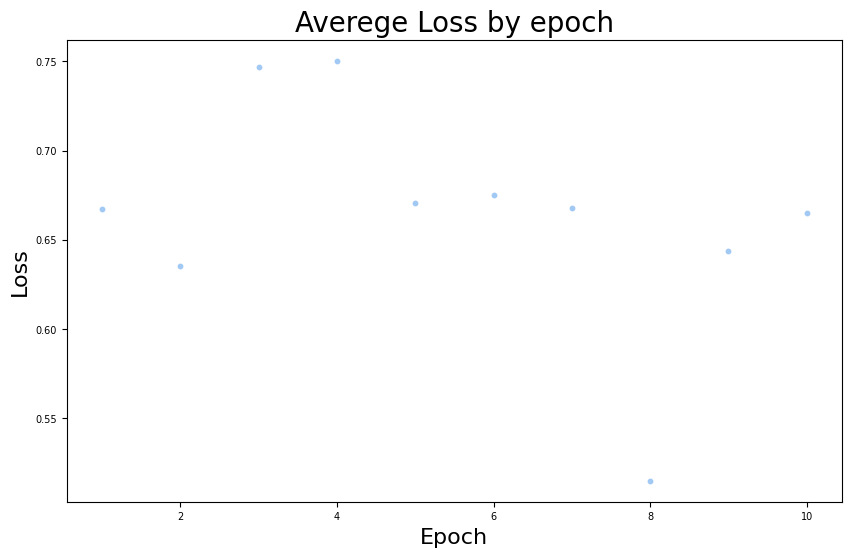

In [ ]:
w1, b1, w2, b2, wOut, bOut, mu = MLP(mlp_x_train, mlp_y_train, p=8, q=4, eta=0.0015)

**Prediction**: we need to recall the trained parameters  {w},{b} and use them to actually get the predictions.

In [ ]:
def MLP_prediction(mlp_x_test, w1, b1, w2, b2, wOut, bOut, mu):
    pred = []

    for i in range(0, mlp_x_test.shape[0]):
        # 1: input the data
        x = mlp_x_test.iloc[i]

        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer

        # Append the prediction;
        # We now need a binary classifier; so we apply an Heaviside Theta and we set  0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )


    return np.array(pred);

In [ ]:
predictions = MLP_prediction(mlp_x_test, w1, b1, w2, b2, wOut, bOut, mu)

In [ ]:
print_results('MLP Neural Network', y_test, predictions)

MLP Neural Network
Accuracy: 0.769
Precision: 0.874
Recall: 0.712
F1 Score: 0.785


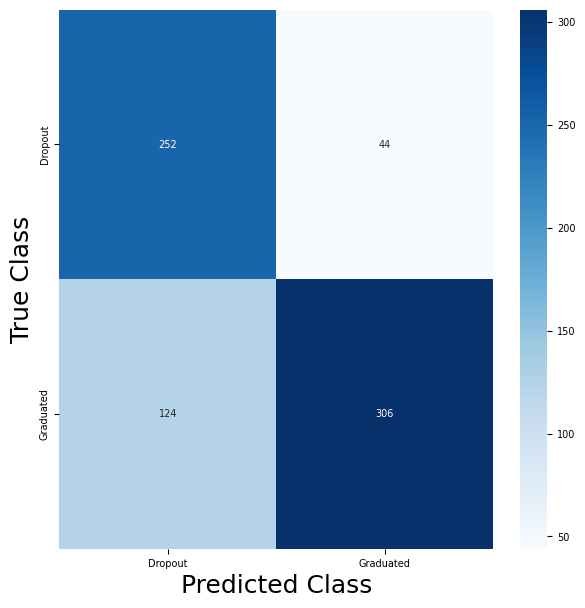

In [ ]:
# Confusion matrix
dict_group = {
    0 : 'Dropout',
    1 : 'Graduated'
}

cm = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_group[i] for i in range(0,2)], columns = [dict_group[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True,cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

# Clustering Algorithms

## Normalize Dataset

In [ ]:
# normalize dataset
from sklearn.preprocessing import MinMaxScaler

cols = original_df.columns
ms = MinMaxScaler()

normalized_df = ms.fit_transform(original_df)
normalized_df = pd.DataFrame(normalized_df, columns=[cols])
normalized_df.head()

,in_debt,tuition_due,enroll_age,Curricular units 1st sem (approved),grade1,Curricular units 2nd sem (approved),grade2,group
0,0.0,1.0,0.056604,0.000000,0.000000,0.00,0.000000,0.0
1,0.0,0.0,0.037736,0.230769,0.741722,0.30,0.735897,1.0
2,0.0,0.0,0.037736,0.000000,0.000000,0.00,0.000000,0.0
3,0.0,1.0,0.056604,0.230769,0.711447,0.25,0.667692,1.0
4,0.0,1.0,0.528302,0.192308,0.653422,0.30,0.700000,1.0


## Find cluster size with KneeLocator

In [ ]:
%pip install kneed

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [ ]:
#### K Means find optimal cluster size
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
# get sse (sum of sqaured errors) for each k in range 1 to 10
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_train)
    sse.append(kmeans.inertia_)

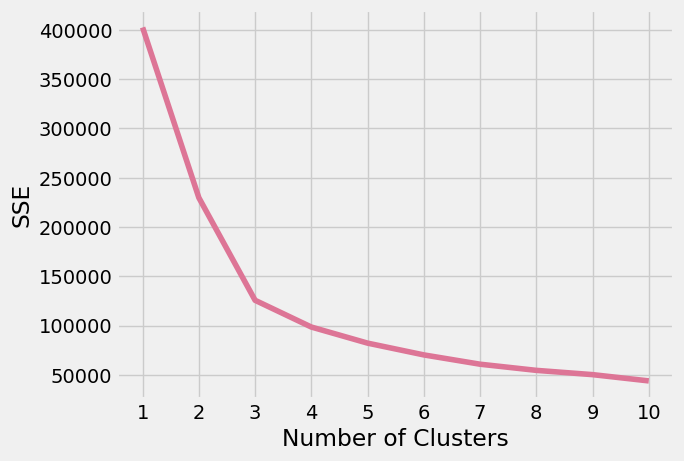

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, color='#DD7596')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

As you can see and also as the KneeLocator function has as a result, we should use 3 clusters.

## K-Means from Scratch

In [ ]:
from scipy.spatial.distance import cdist
k = 3 # from KneeLocator

# choose k objects from dataset

# repeat until no change (do while??):

# (re)assign each object to cluster it is closest to (based on mean value of all objects in the cluster) -> Euclidian distance
# update cluster mean


# run k means 10 times (default)
# each clustering max 100 times?

def kmeans(k, dataset):

    # randomly choose starting centroids
    start = dataset.sample(n=k, random_state=42, replace=False)
    centroids = start

    # find the (euclidean) distance between centroids and all datapoints
    distances = cdist(dataset, centroids ,'euclidean')

    # select shortest distance for each datapoint
    datapoint_clusters = np.array([np.argmin(i) for i in distances])

    # repeat to find best clusters (either 1000 times or when centroids don't change anymore)
    for x in range(1000):
        centroids = []
        for i in range(k):
            # update centroids with each cluster mean
            temp_centroid = dataset[datapoint_clusters == i].mean(axis=0)
            centroids.append(temp_centroid)

        centroids = np.vstack(centroids)

        # check if centroids change
        if(x>0):
          if(centroids.all() == old_centroids.all()): break
        old_centroids = centroids
        distances = cdist(dataset, centroids ,'euclidean')
        datapoint_clusters = np.array([np.argmin(i) for i in distances])

    return datapoint_clusters

In [ ]:
kmeans(3, normalized_df)

array([2, 0, 1, ..., 2, 0, 0])

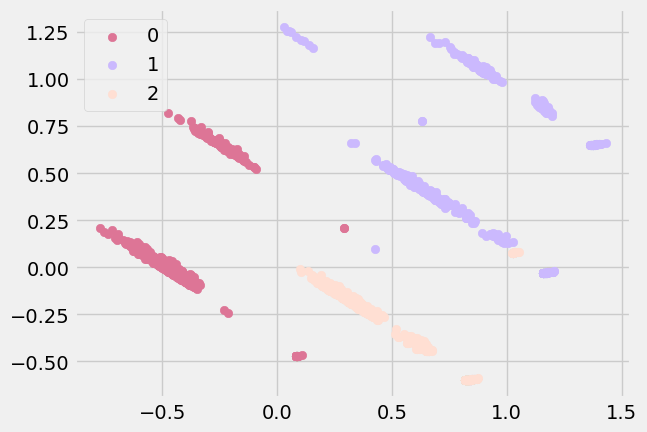

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca_df = pca.fit_transform(normalized_df)

#predict the labels of clusters.
label = kmeans(3,normalized_df)

#Getting unique labels
u_labels = np.unique(label)

colours = [ '#DD7596', '#CBB9FE', '#FFDFD3']

#plotting the results:
for i,c in zip(u_labels, colours):
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i, color=c)
plt.legend()
plt.show()

## K-Means sklearn

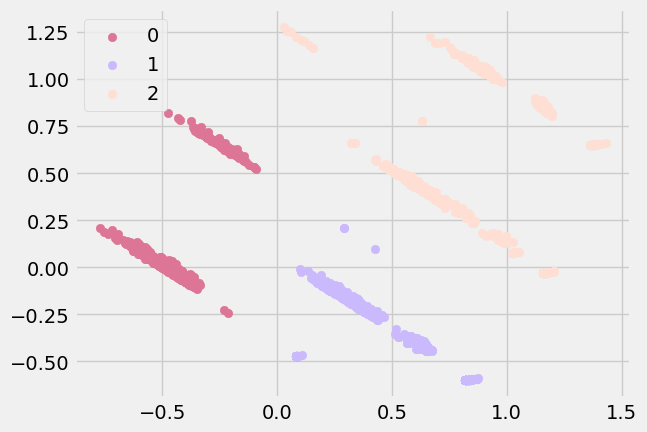

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

clusters = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
pca = PCA(2)
pca_df = pca.fit_transform(normalized_df)

#predict the labels of clusters.
label = clusters.fit_predict(pca_df)

#Getting unique labels
u_labels = np.unique(label)

colours = [ '#DD7596', '#CBB9FE', '#FFDFD3']

#plotting the results:
for i,c in zip(u_labels, colours):
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i, color = c)
plt.legend()
plt.show()

## DBSCAN from Scratch

In [ ]:
# all objects are unvisited
# do
#   randomly select univisited object
#   mark object as visited
#   if (neighbourhood has at least MinPts objects)
#     create new cluster c and add object to it
#     for each point p in neighbourhood
#       if p is unvisited: mark as visited, if neighbourhood has MinPts objects, add them to neighbourhood
#       if p is not part of a cluster, add to cluster c
#     output c
#   else mark p as noise
# until all objects are visited

In [ ]:
from scipy.spatial.distance import cdist

def dbscan(dataset, radius, minPts):
  # labels will have clusterIndex or -1 for noise, 0 means datapoint is unvisited
  labels = [0] * len(dataset)
  clusterIndex = 0

  # start with first datapoint to the end
  for i in range(len(dataset)):
    # only do this for unvisited datapoints
    if(labels[i] == 0):
      neighbourhood = findNeighbourhood(dataset, i, radius)
      # mark as noise if less than minPts neighbours, otherwise start cluster
      if(len(neighbourhood) < minPts):
        labels[i] = -1
      else:
        clusterIndex = clusterIndex + 1
        labels = add_to_cluster(dataset, i, clusterIndex, neighbourhood, radius, minPts, labels)
  print('found clusters:',clusterIndex)
  return labels

def findNeighbourhood(dataset, datapoint, radius):
  neighbours = []
  # find all points with less or equal (euclidean) radius distance from datapoint
  distances = cdist(dataset, np.stack([dataset.iloc[datapoint]]) ,'euclidean')
  for x in range(len(distances)):
    if(distances[x] <= radius):
      neighbours.append(x)
  return neighbours

def add_to_cluster(dataset, datapoint, clusterIndex, neighbourhood, radius, minPts, labels):
  labels[datapoint] = clusterIndex
  counter = 0
  while counter < len(neighbourhood):
    neighbour = neighbourhood[counter]
    # if neighbour was counted as noise before, add to cluster now
    if (labels[neighbour] == -1): labels[neighbour] = clusterIndex
    elif(labels[neighbour] == 0):
      labels[neighbour] = clusterIndex
      # check neighbour's neighbourhood and add to neighbourhood if dense (no duplicates)
      nNeighbourhood = findNeighbourhood(dataset, neighbour, radius)
      if (len(nNeighbourhood) >= minPts):
        helperlist = neighbourhood
        neighbourhood.extend(x for x in nNeighbourhood if x not in helperlist)
    counter = counter +1
  return labels

In [ ]:
cluster = dbscan(normalized_df, 0.3, 10)

found clusters: 17


In [ ]:
print('Noise found:',cluster.count(-1))

Noise found: 31


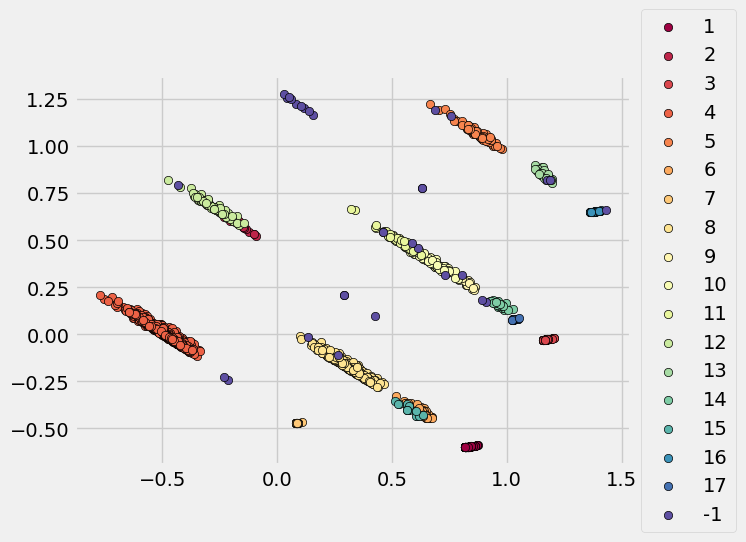

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca_df = pca.fit_transform(normalized_df)

dbscan_label = cluster
unique_labels = set(cluster)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


for i,c in zip(unique_labels, colors):
    plt.scatter(pca_df[np.array(dbscan_label) == i , 0] , pca_df[np.array(dbscan_label) == i , 1] , label = i, color=c, edgecolor='black')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## DBSCAN sklearn



Estimated number of clusters: 17
Estimated number of noise points: 31


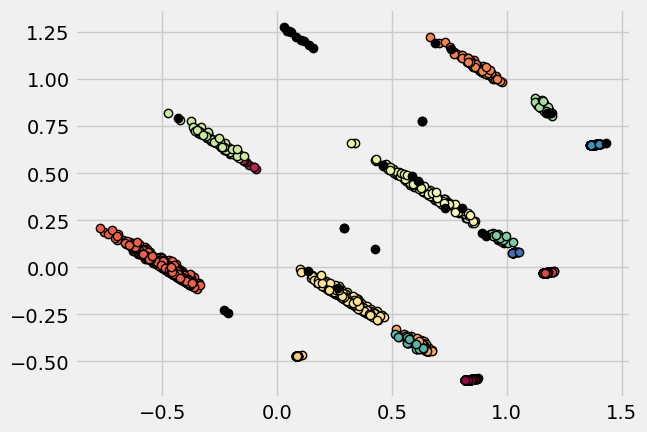

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

pca = PCA(2)
pca_df = pca.fit_transform(normalized_df)

db = DBSCAN(eps=0.3, min_samples=10).fit(normalized_df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0,0,0,1]

    class_member_mask = labels == k

    xy = pca_df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        #markersize=10,
    )

    xy = pca_df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        #markersize=6,
    )

plt.show()

# Prediction for Enrolled Students

We need to predict whether a student will graduate or dropout. For this purpose, we will be using students who are currently enrolled in studies.

In [ ]:
# Keep only enrolled students
df_for_prediction = df_for_prediction[df_for_prediction['group'] == 'Enrolled']

In [ ]:
# Perform one-hot encoding.
df_for_prediction = pd.get_dummies(df_for_prediction, drop_first=True)

In [ ]:
# predict with bayes
df_bayes_prediction = df_for_prediction.iloc[:,0:7]
bayes = bayesian_classifier(df_bayes_prediction)

zero probability: 73
dropout not zero: 64
dropout more likely: 0
graduate more likely: 721


In [ ]:
bayes['predicted_group'].value_counts()

1    721
0     73
Name: predicted_group, dtype: int64

In [ ]:
# predict with decision tree
df_tree_prediction = df_for_prediction.iloc[:,0:7]
tree = decision_tree(df_tree_prediction)

In [ ]:
tree['predicted_class'].value_counts()

1    656
0    138
Name: predicted_class, dtype: int64

In [ ]:
# predict with mlp
df_mlp_prediction = df_for_prediction.iloc[:,0:7]
mlp = MLP_prediction(df_mlp_prediction, w1, b1, w2, b2, wOut, bOut, mu)

In [ ]:
uniqw, inverse = np.unique(mlp, return_inverse=True)
np.bincount(inverse)

array([548, 246])